# 

### Interactive Tools

There are several no-code options for exploring JUMP data. These are
very useful for querying perturbations without needing experience in
data analysis or programming. Detailed usage instructions are below this
brief overview listing:

1.  **JUMPer tools**
    [here](https://github.com/broadinstitute/monorepo/tree/main/libs/jump_rr)

-   Type in your gene/compound of interest and retrieve a list of
    similar genes/compounds  

-   Tools to browse images and inspect enriched features

-   No account creation required

1.  **Morpheus** [here](https://software.broadinstitute.org/morpheus/)

    -   Explore matrices of data and perform basic calculations
    -   Explore heatmaps showing similarity among clustered samples
    -   No account creation required

2.  **Ardigen phenAID JUMP-CP Explorer**
    [here](https://phenaid.ardigen.com/jumpcpexplorer/)

    -   Search similarities among perturbations and more
    -   Account creation required, but access is free

3.  **Spring Discovery JUMP-CP Portal**
    [here](https://www.springscience.com/jump-cp)

    -   Data exploration interface includes plate views, single-cell
        phenotype classification tools, image browsing and more
    -   Account creation required, but access is free

### Usage

#### JUMPrr tools

-   What is the source and version of the replicability metrics
    displayed in Broad’s [JUMPrr
    tools](https://github.com/broadinstitute/monorepo/tree/main/libs/jump_rr)?

    These two files
    ([ORF](https://github.com/jump-cellpainting/2024_Chandrasekaran_Morphmap/blob/c47ad6c953d70eb9e6c9b671c5fe6b2c82600cfc/03.retrieve-annotations/output/phenotypic-activity-wellpos_cc_var_mad_outlier_featselect_sphering_harmony.csv.gz)
    and
    [CRISPR](https://github.com/jump-cellpainting/2024_Chandrasekaran_Morphmap/blob/c47ad6c953d70eb9e6c9b671c5fe6b2c82600cfc/03.retrieve-annotations/output/phenotypic-activity-wellpos_cc_var_mad_outlier_featselect_sphering_harmony_PCA_corrected.csv.gz))
    contain the mAP and corrected p values for replicate retrieval
    (phenotypic activity). They won’t contain all ORF and CRISPR
    reagents because some of them were filtered out for QC reasons.

-   X_Feature: For each row, is the `Feature` value an average for all
    the cells in the `Metadata_image` using the listed `Mask`(region of
    the cell: Nucleus, Cell, or Cytoplasm)? Or is it associated with a
    single cell in that image?

    Any `Feature` is the average of all cells and all replicates
    (typically four in total) for the specific mask and feature.

-   How are `Statistic` and `Median` calculated for each row?

    -   `Statistic` is the probability of a given distribution (four
        replicates) to occur relative to their negative controls (in the
        four plates from which those replicates came; typically each
        replicate is in an independent plate).
    -   `Median` is the median feature across all (~4) replicates. Each
        of these replicates’ value was in turn the mean of all the sites
        and cells in a given well.

#### Morpheus

-   How can I use
    [Morpheus](https://software.broadinstitute.org/morpheus/) to view
    relationships among samples?

1.  Download the ORF and/or CRISPR data from
    <https://doi.org/10.5281/zenodo.14025602> or from
    <https://zenodo.org/records/14165010> (a smaller file with only
    genes having cosine similarity \> 0.5 with other genes).

2.  Drag and drop one of those files into Morpheus (at
    https://software.broadinstitute.org/morpheus/ in your web browser;
    no need to install it)

3.  Go to Tools \> Similarity Matrix and choose Metric = cosine
    similarity and Compute matrix for = Columns

4.  Cluster the genes using Tools \> Hierarchical clustering (we
    recommend 1 minus Pearson correlation, but other options are fine)
    for both rows and columns

    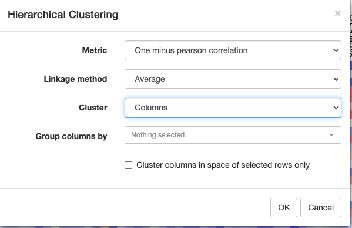

5.  Click the gear icon towards the top right and choose “Annotations”
    tab  

6.  Choose Symbol (for Rows and Columns) so that gene names will appear.
    You can also choose various annotations of genes, like biological
    process or molecular function but those names are long and make it
    hard to see unless you have a huge screen.  

7.  Play around!

    -   To find a gene of interest, in the search box type Symbol: then
        start typing the name and it will appear as highlighted in the
        scroll bar so you can scroll to find it. But if you are looking
        for top matches to a gene, note that clustering can have weird
        behavior, putting the closest match pretty far away depending on
        the other data points. The broad.io Datasette links (JUMPer
        tools) more directly answer the “top/bottom matches” question
        and take less hands-on time to configure and less compute time
        to load.
        -   doubleclick a gene name and the data matrix will sort to
            show you the closest matches on one end and the strongest
            anti-correlators at the other. To go back to your original
            view, just keep clicking the same gene you originally sorted
            by, it will change back to the previous sort eventually.  
        -   note that in clustered view you can’t see anti-correlations
            which anecdotally seem more strong/common in CRISPR data. So
            clusters are a bit more interesting in ORF data.  
        -   If you would like to trim the similarity matrix to only show
            genes with a strong match, you can follow this procedure:
            -   Add a new annotation by going to Tools \> Create
                Calculated Annotation, with the name ‘#Matches’ with the
                formula COUNTIF(“\>0.7”) This counts the number of genes
                where the similarity is above 0.7 (you can pick whatever
                threshold you prefer). Repeat this step for both rows
                and columns. *Warning: although this seems like a simple
                step, for some reason it is fairly intensive and might
                require a suitably powerful computer - if the browser
                asks to Wait or Exit, waiting sometimes works.*  
            -   Filter samples where ‘#Matches’ \>=2 (because every
                sample matches itself); again repeat this for both rows
                and columns.  
            -   This will yield ~350 genes in the ORF data, for example.
                You can increase the number of matches to filter (to 3
                or 4, as you prefer).